## Imports

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.metrics import ConfusionMatrixDisplay, recall_score, accuracy_score,f1_score, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier


## Read in cleaned data

In [2]:
df_subreddits = pd.read_csv('./00_cleaned_data/subreddits.csv')

In [3]:
df_subreddits.head()

,title,text,auth,time,subreddit,full_text,letter_count,word_count,subreddit_code
0,"Every woman who is not lesbian is gay, (girls ...",NaN,Altruistic_Rest_9861,1643317371,showerthoughts,"Every woman who is not lesbian is gay, (girls ...",131,26,0
1,Everyone keeps their phone on silent because w...,NaN,smcmahon710,1643317311,showerthoughts,Everyone keeps their phone on silent because w...,81,13,0
2,A good book will always be new.,NaN,agreatday248,1643317210,showerthoughts,A good book will always be new.,31,7,0
3,"Science can either prove that no deity exists,...",NaN,shimkei,1643317183,showerthoughts,"Science can either prove that no deity exists,...",132,26,0
4,The fact that I have to actively remind myself...,NaN,DawnMayRise,1643317126,showerthoughts,The fact that I have to actively remind myself...,118,22,0


## Train - Test - Split

In [4]:
X = df_subreddits[['full_text', 'letter_count', 'word_count']]

y = df_subreddits['subreddit']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=10)

In [6]:
X_train.shape

(14548, 3)

In [7]:
X_test.shape

(4850, 3)

In [8]:
y_train.shape

(14548,)

In [9]:
y_test.shape

(4850,)

## GradientBoosting Classifier model

In [10]:
cv = CountVectorizer()

In [11]:
text_vectorizer = make_column_transformer((cv, 'full_text'), remainder='passthrough', n_jobs=-1, verbose_feature_names_out=False)

In [12]:
gb = GradientBoostingClassifier()

In [13]:
pipe = make_pipeline(text_vectorizer, gb)

In [14]:
pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(n_jobs=-1, remainder='passthrough',
                     transformers=[('countvectorizer', CountVectorizer(),
                                    'full_text')],
                     verbose_feature_names_out=False)),
  ('gradientboostingclassifier', GradientBoostingClassifier())],
 'verbose': False,
 'columntransformer': ColumnTransformer(n_jobs=-1, remainder='passthrough',
                   transformers=[('countvectorizer', CountVectorizer(),
                                  'full_text')],
                   verbose_feature_names_out=False),
 'gradientboostingclassifier': GradientBoostingClassifier(),
 'columntransformer__n_jobs': -1,
 'columntransformer__remainder': 'passthrough',
 'columntransformer__sparse_threshold': 0.3,
 'columntransformer__transformer_weights': None,
 'columntransformer__transformers': [('countvectorizer',
   CountVectorizer(),
   'full_text')],
 'columntransformer__verbose': False,
 'colu

In [15]:
params = {
    'gradientboostingclassifier__max_depth': [2,3,4],
    'gradientboostingclassifier__n_estimators': [100, 125, 150],
    'gradientboostingclassifier__learning_rate': [.08, .1, .12], 
    'columntransformer__countvectorizer__ngram_range':[(1,2), (1,3)], 
    'columntransformer__countvectorizer__max_df':[0.8, 0.9, 1],
    'columntransformer__countvectorizer__min_df':[0, 0.1, 0.2],
    'columntransformer__countvectorizer__stop_words':[None, 'english']
}

In [16]:
gs = GridSearchCV(pipe, params, n_jobs=-1)

In [17]:
gs.fit(X_train, y_train)

/Users/annarutledge/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1620 fits failed out of a total of 4860.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/annarutledge/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/annarutledge/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/annarutledge/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 348, in _fit
   

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=-1,
                                                          remainder='passthrough',
                                                          transformers=[('countvectorizer',
                                                                         CountVectorizer(),
                                                                         'full_text')],
                                                          verbose_feature_names_out=False)),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'columntransformer__countvectorizer__max_df': [0.8,
                                                                        0.9,
                                                                        1],
                         

In [ ]:
gs.best_estimator_

#### GS Best Estimator Parameters
##### Count Vectorizer:
max_df = 0.8
<br>
min_df = 0
<br>
ngram_range = (1,2)

##### GradientBoost Classifier:
learning_rate = 0.12
<br>
max_depth = 4
<br>
n_estimators = 150

In [20]:
y_preds = gs.predict(X_test)

In [21]:
y_preds

array(['crazyideas', 'crazyideas', 'crazyideas', ..., 'showerthoughts',
       'showerthoughts', 'crazyideas'], dtype=object)

### Accuracy score

In [22]:
gs.score(X_test, y_test)

0.8321649484536082

In [23]:
accuracy_score(y_test, y_preds)

0.8321649484536082

### Recall/sensitivity score

In [25]:
recall_score(y_test, y_preds, pos_label='crazyideas')

0.8333333333333334

### Precision score

In [26]:
precision_score(y_test, y_preds, pos_label='crazyideas')

0.8367181153533713

### F1 Score

In [27]:
f1_score(y_test, y_preds, pos_label='crazyideas')

0.8350222942845561

### Confusion Matrix

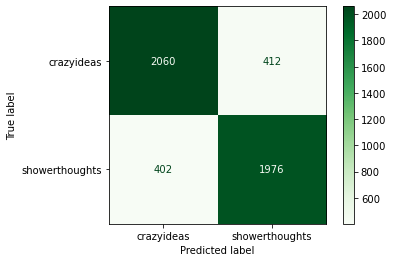

In [28]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds, cmap='Greens');